<a href="https://colab.research.google.com/github/ninjab3381/CNN_Robotic_Inference/blob/master/cnn_inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import keras
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


Using TensorFlow backend.


In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 60

datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.1)

train_generator = datagen.flow_from_directory(
    'drive/My Drive/Synopsys/pics/',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    'drive/My Drive/Synopsys/pics/',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 396 images belonging to 11 classes.
Found 44 images belonging to 11 classes.


In [3]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((60, 224, 224, 3), (60, 11))

In [4]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

from tensorflow.keras.applications import(
    vgg16, 
    inception_v3, 
    resnet50, 
    mobilenet, 
    MobileNetV2
)
import numpy as np

# Create the base model from the pre-trained model MobileNet V2
base_model = inception_v3.InceptionV3(input_shape=IMG_SHAPE,
                   include_top=False, 
                   weights='imagenet')

87916544/87910968 [==============================] - 3s 0us/step


In [0]:
base_model.trainable = False

In [0]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

model = Sequential([
  base_model,
])
model.add(Conv2D(32, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())
model.add(Dense(11, activation='softmax'))

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 3, 3, 32)          589856    
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 11)                363       
Total params: 22,393,003
Trainable params: 590,219
Non-trainable params: 21,802,784
_________________________________________________________________


In [9]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [10]:
epochs = 200

history = model.fit_generator(train_generator, 
                    epochs=epochs, 
                    validation_data=val_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 1 steps
Epoch 1/200
7/7 [==============================] - 231s 33s/step - loss: 3.9156 - accuracy: 0.1540 - val_loss: 2.2292 - val_accuracy: 0.1591
Epoch 2/200
7/7 [==============================] - 10s 1s/step - loss: 2.1268 - accuracy: 0.1717 - val_loss: 2.2680 - val_accuracy: 0.1818
Epoch 3/200
7/7 [==============================] - 10s 1s/step - loss: 2.0319 - accuracy: 0.2197 - val_loss: 2.1703 - val_accuracy: 0.2045
Epoch 4/200
7/7 [==============================] - 10s 1s/step - loss: 1.9162 - accuracy: 0.2045 - val_loss: 2.1850 - val_accuracy: 0.1818
Epoch 5/200
7/7 [==============================] - 10s 1s/step - loss: 1.8154 - accuracy: 0.1869 - val_loss: 2.0297 - val_accuracy: 0.1818
Epoch 6/200
7/7 [==============================] - 10s 1s/step - loss: 1.7020 - accuracy: 0.2677 - val_loss: 2.0387 - val_accuracy: 0.272

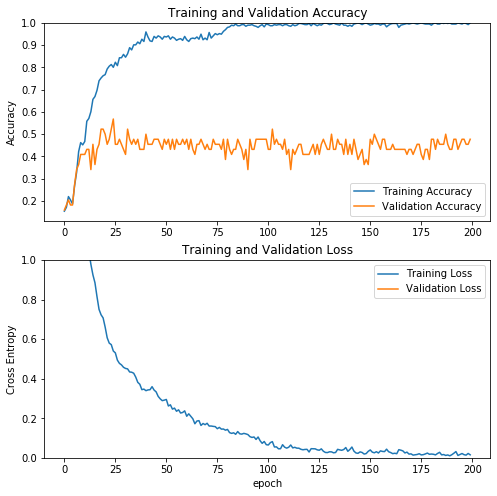

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
base_model.trainable = True

In [13]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  311


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 3, 3, 32)          589856    
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 11)                363       
Total params: 22,393,003
Trainable params: 20,216,587
Non-trainable params: 2,176,416
_________________________________________________________________


In [16]:
history_fine = model.fit_generator(train_generator, 
                                   epochs=200,
                                   validation_data=val_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 1 steps
Epoch 1/200
7/7 [==============================] - 18s 3s/step - loss: 0.0119 - accuracy: 0.9975 - val_loss: 6.5866 - val_accuracy: 0.4318
Epoch 2/200
7/7 [==============================] - 11s 2s/step - loss: 0.1514 - accuracy: 0.9646 - val_loss: 6.2431 - val_accuracy: 0.4545
Epoch 3/200
7/7 [==============================] - 11s 2s/step - loss: 0.0736 - accuracy: 0.9848 - val_loss: 6.0064 - val_accuracy: 0.4318
Epoch 4/200
7/7 [==============================] - 10s 1s/step - loss: 0.0678 - accuracy: 0.9823 - val_loss: 5.7288 - val_accuracy: 0.4773
Epoch 5/200
7/7 [==============================] - 11s 2s/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 5.6207 - val_accuracy: 0.4773
Epoch 6/200
7/7 [==============================] - 11s 2s/step - loss: 0.0374 - accuracy: 0.9924 - val_loss: 5.4822 - val_accuracy: 0.4773
Epoch 7/200
7/7 [==============================] - 11s 2s/step - loss: 0.045

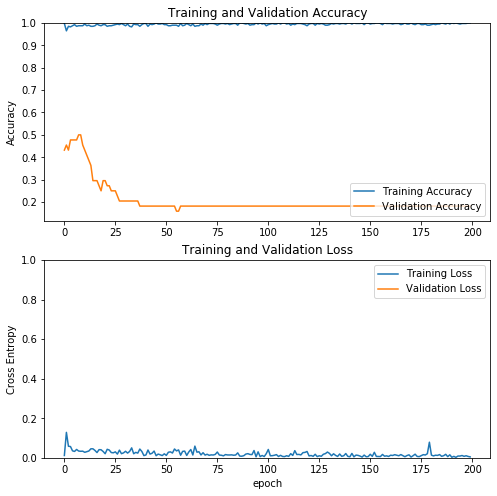

In [17]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 3, 3, 32)          589856    
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 11)                363       
Total params: 22,393,003
Trainable params: 20,216,587
Non-trainable params: 2,176,416
_________________________________________________________________


In [19]:
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet
import numpy as np
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

17227776/17225924 [==============================] - 1s 0us/step


In [20]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

import urllib.request
import cv2
import numpy as np

# image loader
def get_image(loc, resize=400):
  """
  downloads an image from url, converts to numpy array,
  resizes, and returns it
  """
  img = cv2.imread(loc)
  # img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (400, 400), interpolation=cv2.INTER_CUBIC)


  # cropped = img[50:274, 50:274] - spoon
  cropped = img[100:324, 100:324]

  return cropped

     |████████████████████████████████| 28.2MB 1.4MB/s 
ERROR: tensor2tensor 1.14.1 has requirement tensorflow-probability==0.7.0, but you'll have tensorflow-probability 0.9.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
loc = 'drive/My Drive/Synopsys/pics/alfoil/alfoil_10.png'
# loc = 'drive/My Drive/Synopsys/pics/milkcan/milkcan_10.png'
# loc = 'drive/My Drive/Synopsys/pics/spoon/spoon_20.png'
loc = 'drive/My Drive/Synopsys/pics/glassbottle/glassbottle_10.png'
# loc = 'drive/My Drive/Synopsys/pics/cokecan/cokecan_30.png'

PIL image size 150528


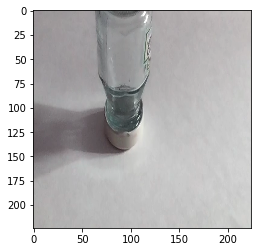

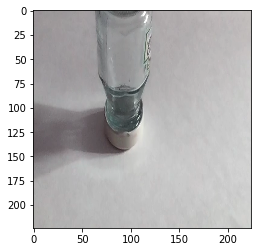

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


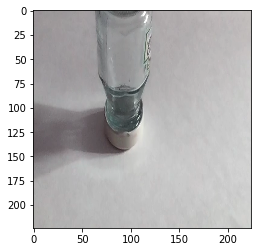

In [22]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
original = get_image(loc, 224)
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)a
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

0 0.80311257
1 4.9813336e-09
2 4.291904e-23
3 4.9493833e-15
4 2.1976139e-06
5 1.7071886e-15
6 5.942985e-16
7 0.00060332665
8 0.19628185
9 1.2042314e-22
10 2.4010615e-33


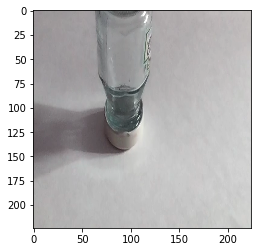

In [23]:
# prepare the image for the inception_v3 model
processed_image = inception_v3.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
i = 1
for i, prediction in enumerate(predictions[0]):
  print(i, prediction)

In [24]:
print (train_generator.class_indices)
print (list(train_generator.class_indices))

{'alfoil': 0, 'box': 1, 'cbcontainer': 2, 'cokecan': 3, 'glassbottle': 4, 'm_and_m': 5, 'milkcan': 6, 'plasticbottle': 7, 'spoon': 8, 'steelspoon': 9, 'straw': 10}
['alfoil', 'box', 'cbcontainer', 'cokecan', 'glassbottle', 'm_and_m', 'milkcan', 'plasticbottle', 'spoon', 'steelspoon', 'straw']


In [25]:
lst = list(zip(predictions[0], list(train_generator.class_indices)))
print(lst)

[(0.80311257, 'alfoil'), (4.9813336e-09, 'box'), (4.291904e-23, 'cbcontainer'), (4.9493833e-15, 'cokecan'), (2.1976139e-06, 'glassbottle'), (1.7071886e-15, 'm_and_m'), (5.942985e-16, 'milkcan'), (0.00060332665, 'plasticbottle'), (0.19628185, 'spoon'), (1.2042314e-22, 'steelspoon'), (2.4010615e-33, 'straw')]


In [26]:
from operator import itemgetter
print(max(lst, key = itemgetter(0))) 

(0.80311257, 'alfoil')


In [27]:
path = F"/content/drive/My Drive/Models/Inception/ninja_cnn_inception"
model.save(path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Models/Inception/ninja_cnn_inception/assets


In [28]:
model.input_shape

(None, 224, 224, 3)